# MSA 2025 Phase 2 - Part 1

In [13]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [14]:
# Load dataset and display first 10 rows

# Load the dataset from the datasets folder
file_path = "store_sales.csv"

# Try reading with ISO-8859-1
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first 10 rows
df.head(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
5,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
6,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
7,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
8,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
9,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


In [15]:
# Automatically compute key statistics (mean, std, etc.) for numeric columns

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Generate descriptive statistics including mean, std, min, 25%, 50%, 75%, max
statistics = numeric_df.describe()

# Optionally round the results for clarity
statistics = statistics.round(2)

# Display the statistics
statistics


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.00,2121.00,2121.00,2121.00,2121.00,2121.00
mean,5041.64,55726.56,349.83,3.79,0.17,8.70
std,2885.74,32261.89,503.18,2.25,0.18,136.05
min,1.00,1040.00,1.89,1.00,0.00,-1862.31
25%,2568.00,22801.00,47.04,2.00,0.00,-12.85
50%,5145.00,60505.00,182.22,3.00,0.20,7.77
75%,7534.00,90032.00,435.17,5.00,0.30,33.73
max,9991.00,99301.00,4416.17,14.00,0.70,1013.13


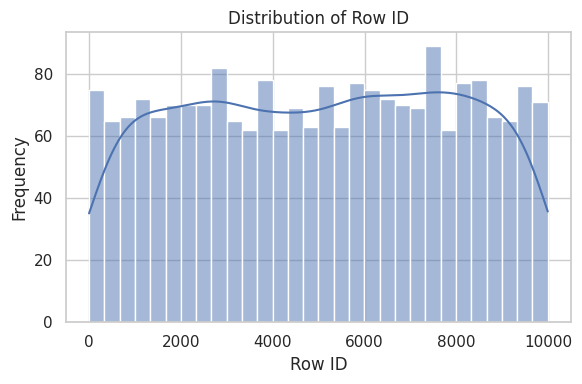

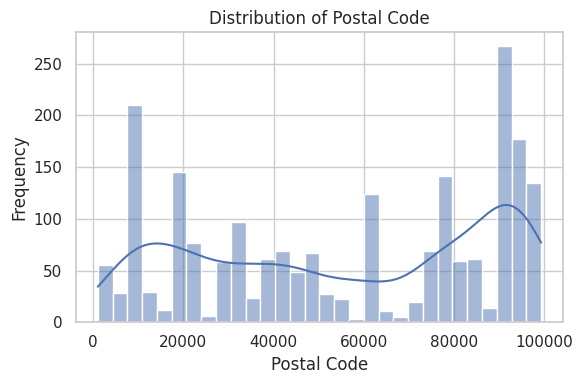

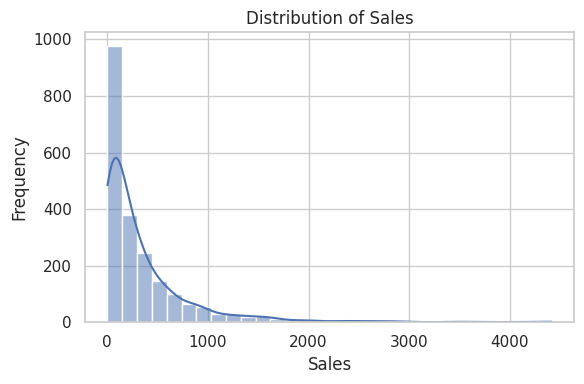

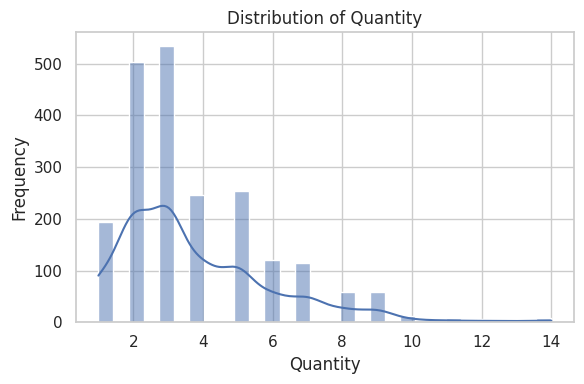

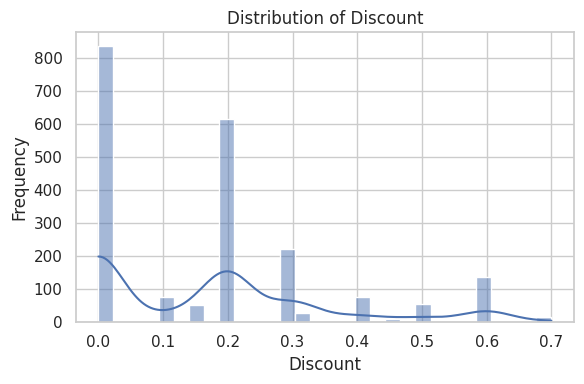

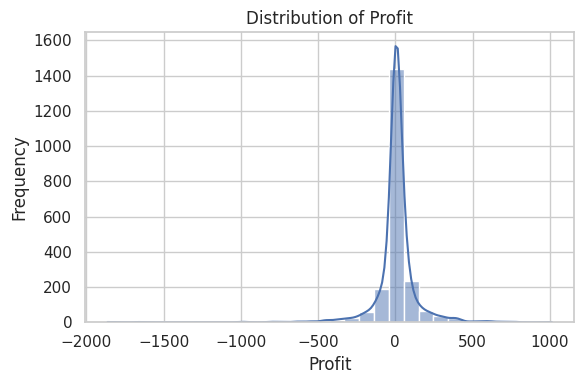

In [16]:
# Visualise numerical columns with histograms, boxplots, and barplots

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Set plot style
sns.set(style="whitegrid")

# Histograms for distribution
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


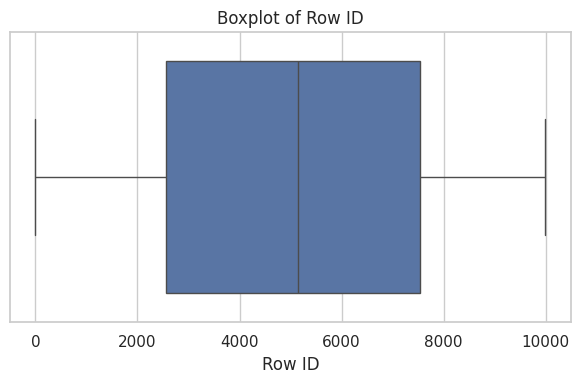

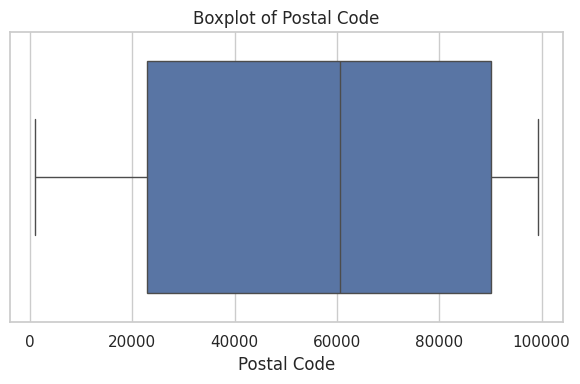

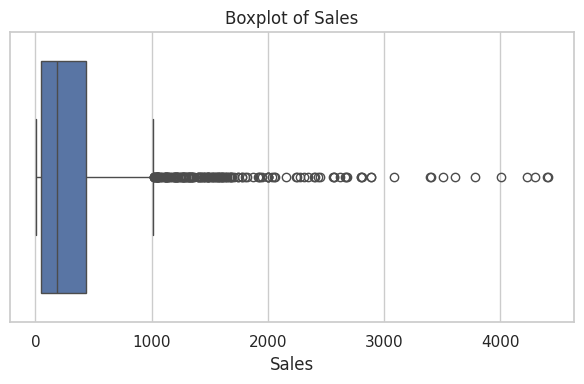

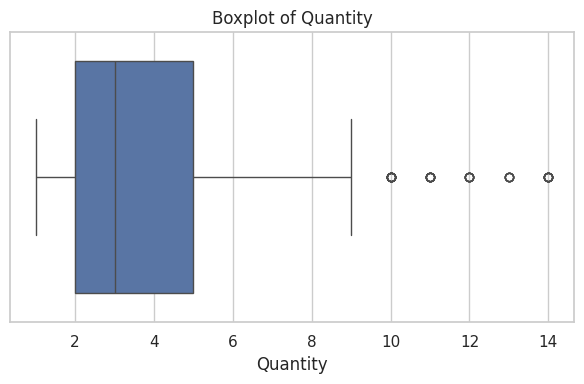

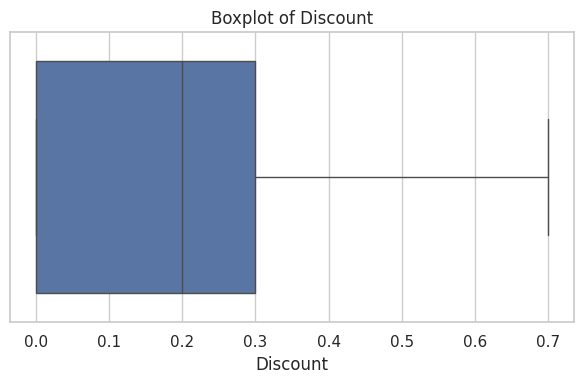

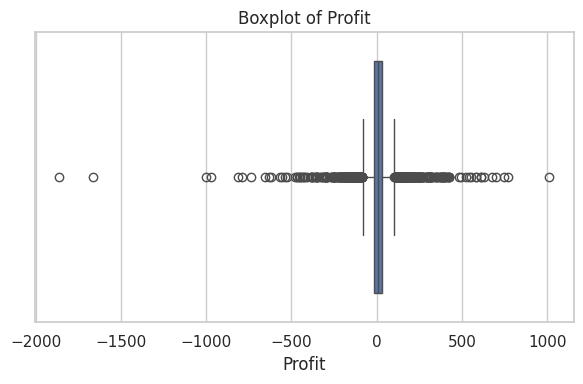

In [17]:
# Boxplots to detect outliers
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [28]:
# Convert non-numeric columns to numeric (with exclusions)

from sklearn.preprocessing import LabelEncoder

# Step 1: Define columns that should NOT be encoded
exclude_cols = [
    'Row ID', 'Order ID', 'Customer ID', 'Product ID',
    'Customer Name', 'Product Name', 'Order Date', 'Ship Date', 'Postal Code'
]

# Step 2: Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

# Step 3: Filter non-numeric columns for those that should be encoded
encode_candidates = [col for col in non_numeric_cols if col not in exclude_cols]

# Step 4: Separate those suitable for Label Encoding (low cardinality)
label_encodable = [col for col in encode_candidates if df[col].nunique() <= 10]

# Step 5: Apply Label Encoding to binary or low-cardinality categorical columns
le = LabelEncoder()
for col in label_encodable:
    df[col] = le.fit_transform(df[col])

# Step 6: One-hot encode high-cardinality columns (excluding already label-encoded)
high_cardinality = [col for col in encode_candidates if col not in label_encodable]
df = pd.get_dummies(df, columns=high_cardinality, drop_first=True)

# Step 7: Check final result
print("\nRemaining non-numeric columns:", df.select_dtypes(include=['object']).columns.tolist())
print("Final dataset shape:", df.shape)
df.dtypes.head(10)



Remaining non-numeric columns: []
Final dataset shape: (2121, 6204)


,0
Row ID,int64
Ship Mode,int64
Segment,int64
Country,int64
Postal Code,int64
Region,int64
Category,int64
Sub-Category,int64
Sales,float64
Quantity,int64


In [27]:
# Check actual column names
print("Original column names:")
print(df.columns.tolist())

Original column names:
['Row ID', 'Ship Mode', 'Segment', 'Country', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order ID_CA-2014-100678', 'Order ID_CA-2014-100706', 'Order ID_CA-2014-100916', 'Order ID_CA-2014-101462', 'Order ID_CA-2014-101560', 'Order ID_CA-2014-101602', 'Order ID_CA-2014-101931', 'Order ID_CA-2014-102295', 'Order ID_CA-2014-102652', 'Order ID_CA-2014-102869', 'Order ID_CA-2014-103086', 'Order ID_CA-2014-103219', 'Order ID_CA-2014-103310', 'Order ID_CA-2014-103317', 'Order ID_CA-2014-103331', 'Order ID_CA-2014-103849', 'Order ID_CA-2014-103940', 'Order ID_CA-2014-103989', 'Order ID_CA-2014-104178', 'Order ID_CA-2014-104269', 'Order ID_CA-2014-104283', 'Order ID_CA-2014-104472', 'Order ID_CA-2014-104563', 'Order ID_CA-2014-105165', 'Order ID_CA-2014-105249', 'Order ID_CA-2014-105270', 'Order ID_CA-2014-105417', 'Order ID_CA-2014-105648', 'Order ID_CA-2014-105984', 'Order ID_CA-2014-106229', 'Order ID_CA-2014-106264'

In [26]:
# ====================== FIXED DATE FORMAT & TIME VISUALISATION ======================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------------------
# 1. Strip spaces from column names (prevent key error)
df.columns = df.columns.str.strip()

# ------------------------------------------------------------------------
# 2. Convert 'Order Date' to datetime using correct format: MM/DD/YYYY
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%m/%d/%Y', errors='coerce')

# ------------------------------------------------------------------------
# 3. Extract Year and Month
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.to_period('M')  # Example: 2016-11

# ------------------------------------------------------------------------
# 4a. Monthly Aggregation
monthly_agg = (
    df.groupby('Month')
      .agg(Total_Sales=('Sales', 'sum'),
           Total_Profit=('Profit', 'sum'),
           Order_Count=('Order_ID', 'nunique'))
      .reset_index()
)
monthly_agg['Month'] = monthly_agg['Month'].dt.to_timestamp()  # for plotting

# ------------------------------------------------------------------------
# 4b. Yearly Aggregation
yearly_agg = (
    df.groupby('Year')
      .agg(Total_Sales=('Sales', 'sum'),
           Total_Profit=('Profit', 'sum'),
           Order_Count=('Order_ID', 'nunique'))
      .reset_index()
)

# ------------------------------------------------------------------------
# 5a. Monthly Trends: Sales & Profit
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_agg, x='Month', y='Total_Sales', label='Sales')
sns.lineplot(data=monthly_agg, x='Month', y='Total_Profit', label='Profit')
plt.title('Monthly Sales & Profit Trends')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------
# 5b. Monthly Order Volume
plt.figure(figsize=(12, 4))
sns.barplot(data=monthly_agg, x='Month', y='Order_Count', color='steelblue')
plt.title('Monthly Order Volume')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------
# 5c. Yearly Summary: Sales & Profit
fig, ax1 = plt.subplots(figsize=(8, 5))
sns.barplot(data=yearly_agg, x='Year', y='Total_Sales', ax=ax1, color='skyblue')
ax1.set_ylabel('Total Sales')
ax1.set_title('Yearly Sales & Profit Comparison')

# Profit line
ax2 = ax1.twinx()
sns.lineplot(data=yearly_agg, x='Year', y='Total_Profit', ax=ax2, marker='o', color='orange', label='Profit')
ax2.set_ylabel('Total Profit')
fig.tight_layout()
plt.show()


KeyError: 'Order_Date'

## 2. Clean data

In [18]:
#

## 3. Visualise data

In [19]:
#

## 4. Identify correlated variables

In [20]:
#

## 5. Summary